# Imports 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(style="white", palette="pastel", color_codes=True)

# random state for consistent results + funny number
state = 142857

# Data loading and feature extraction

## Data loading and basics viewing

In [2]:
data = pd.read_csv('../input/pokemon.csv')

data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Seeing what we are trying to predict.

In [4]:
targets = list(set(data['Type 1']))
print('Target list:', targets)
print('Target number: %d' % len(targets))

Target list: ['Water', 'Rock', 'Normal', 'Electric', 'Fairy', 'Ice', 'Ghost', 'Fire', 'Bug', 'Grass', 'Dark', 'Steel', 'Flying', 'Ground', 'Poison', 'Psychic', 'Dragon', 'Fighting']
Target number: 18


## Feature extraction

### Type 1

We encode the 'Type 1' of each pokemon as an integer to do the plots.

In [5]:
from sklearn.preprocessing import LabelEncoder

t1_encoder = LabelEncoder()
t1_encoder.fit(data['Type 1'])
data['Encoded Type 1'] = t1_encoder.transform(data['Type 1'])

data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Encoded Type 1
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,9
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,9
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,9
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,6


### Type 2

Replacing the NaN Type 2 with 'None'. 

In [6]:
data['Type 2'].fillna('None', inplace = True)

data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Encoded Type 1
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,9
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,9
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,9
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,6


Creating dummy variables for the Type 2.

In [7]:
t2_dummies = pd.get_dummies(data['Type 2'])
data = data.drop(['Type 2'], axis = 1).join(t2_dummies)
data.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Grass,Ground,Ice,None,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,309,39,52,43,60,50,65,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Plots

## Attributes values grouped by Type 1

(-0.5, 17.5)

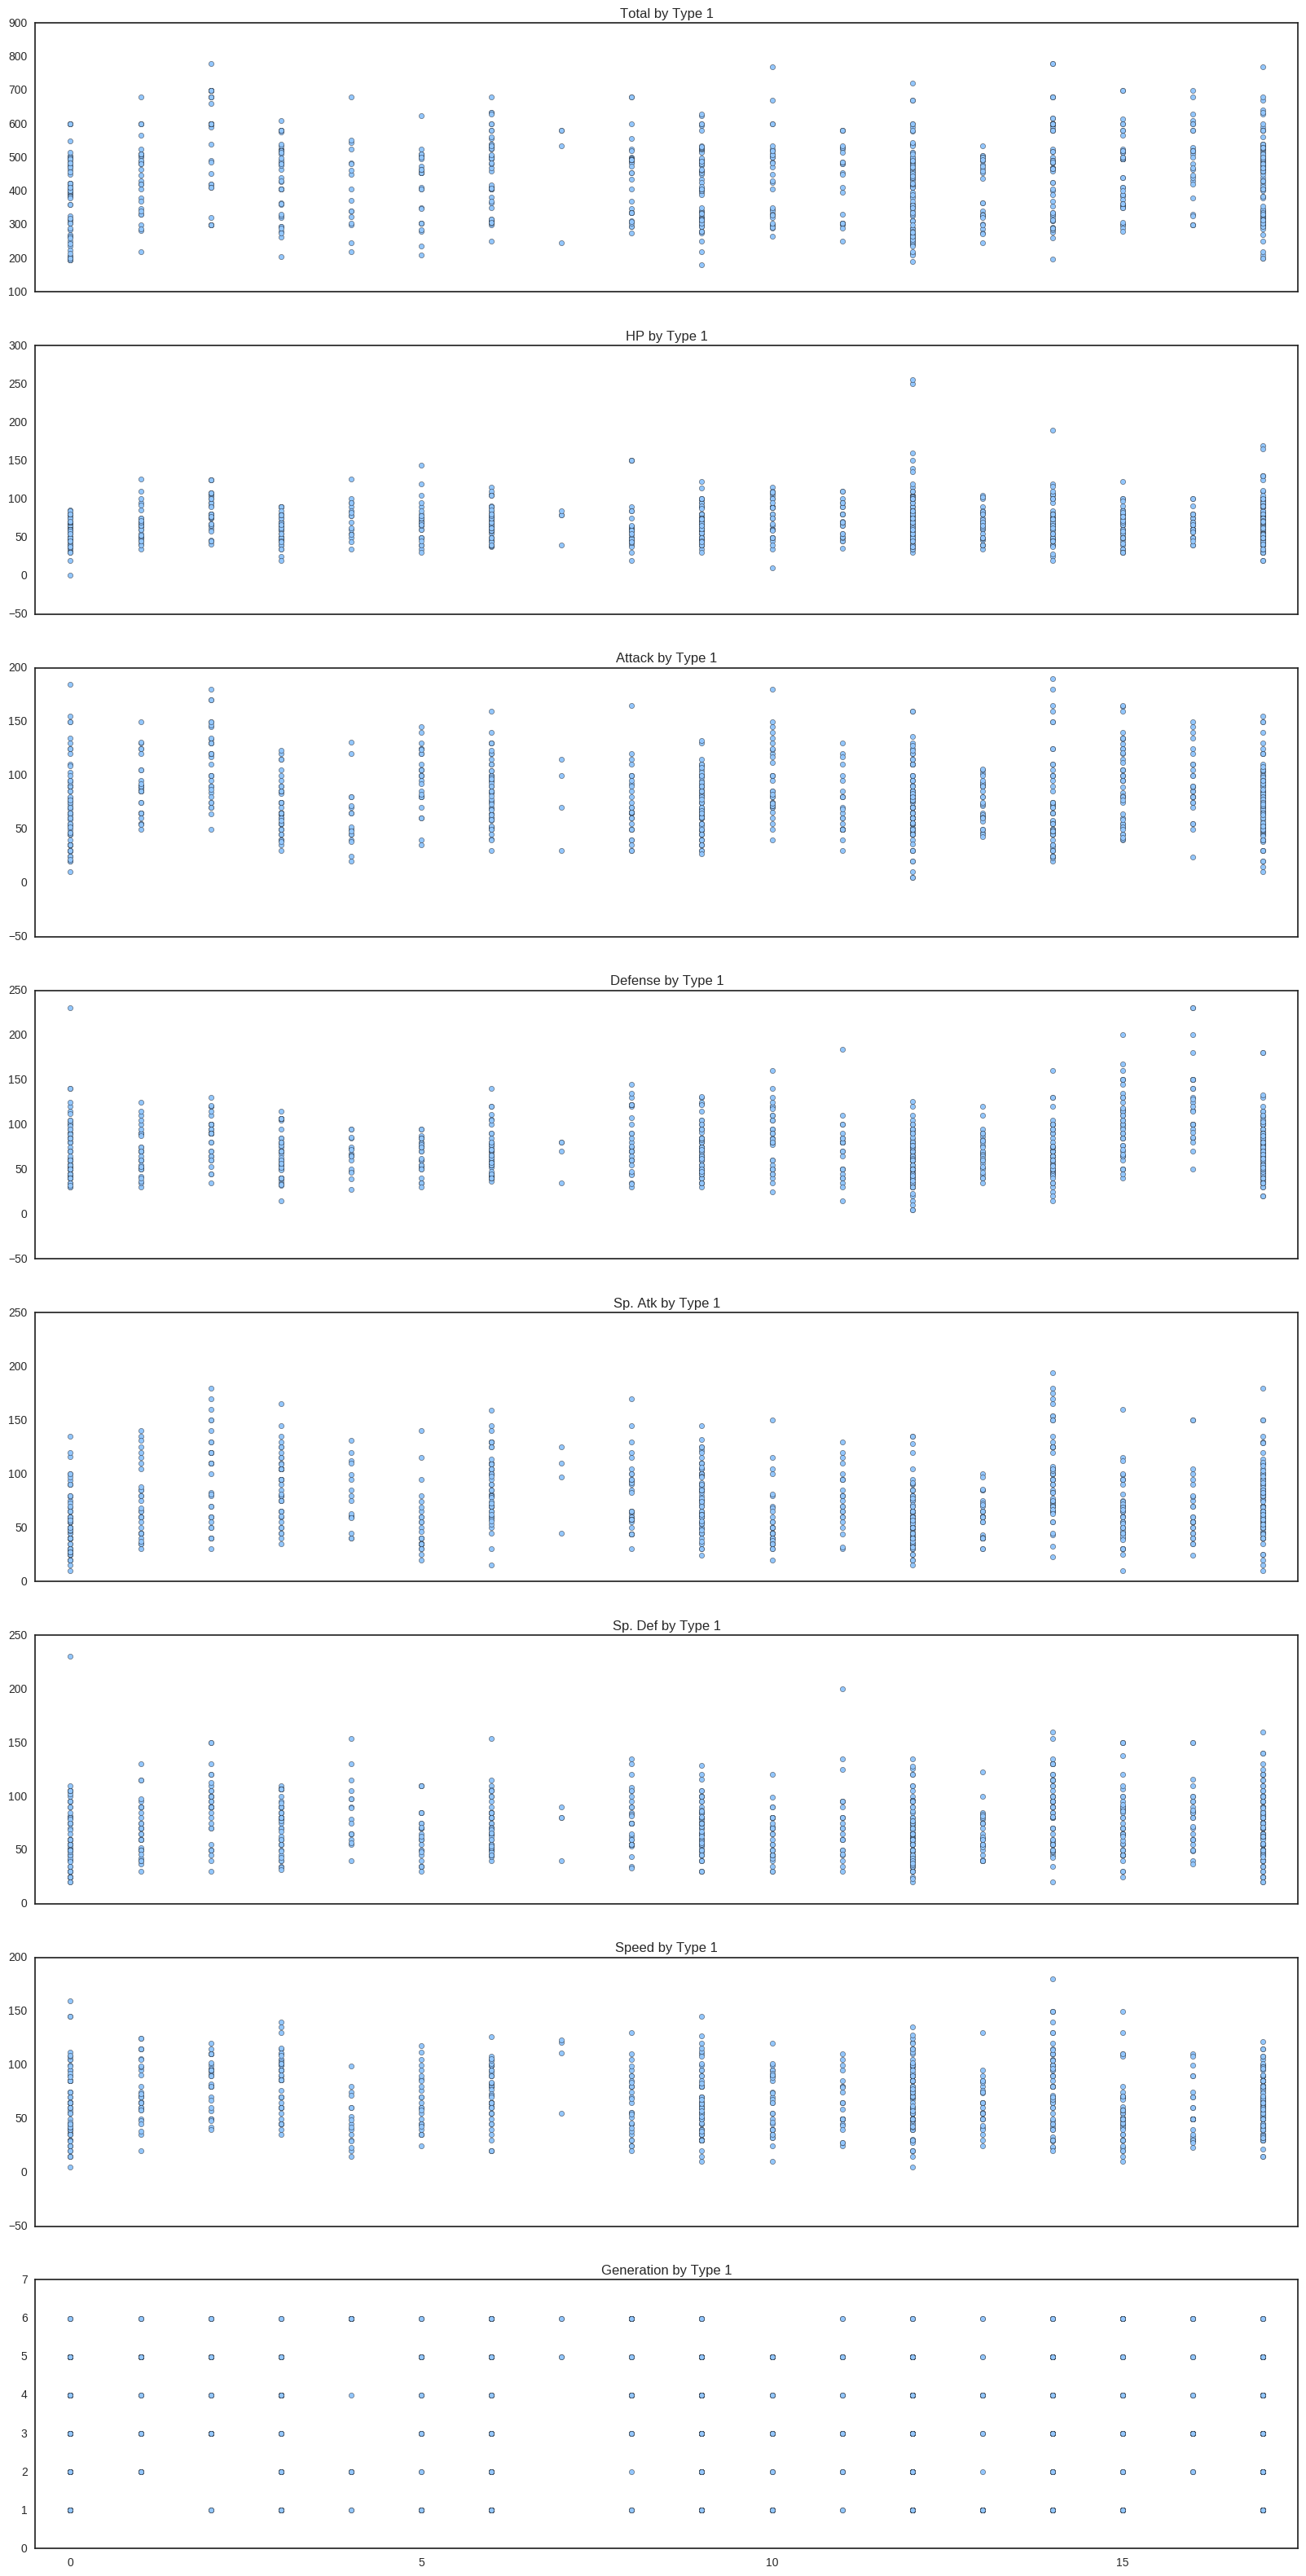

In [8]:
col_names = data.columns
fig, axes = plt.subplots(8, 1, figsize = (20, 40), sharex = True)
for i in range(8):
    col_index = i + 3
    axes[i].scatter(data['Encoded Type 1'], data.iloc[:, col_index])
    axes[i].set_title('%s by Type 1' % col_names[col_index])
plt.xlim(-0.5, 17.5)

# Machine learning

## Feature selection

We drop the columns that we will not use and creating the target DataFrame.

In [9]:
X_df = data.drop(['#', 'Name', 'Type 1', 'Encoded Type 1', 'Total'], axis = 1)
y_df = data['Encoded Type 1']
X = X_df.as_matrix()
y = y_df.as_matrix()

X_df.head().transpose()

,0,1,2,3,4
HP,45,60,80,80,39
Attack,49,62,82,100,52
Defense,49,63,83,123,43
Sp. Atk,65,80,100,122,60
Sp. Def,65,80,100,120,50
Speed,45,60,80,80,65
Generation,1,1,1,1,1
Legendary,False,False,False,False,False
Bug,0,0,0,0,0
Dark,0,0,0,0,0


## PCA visualization

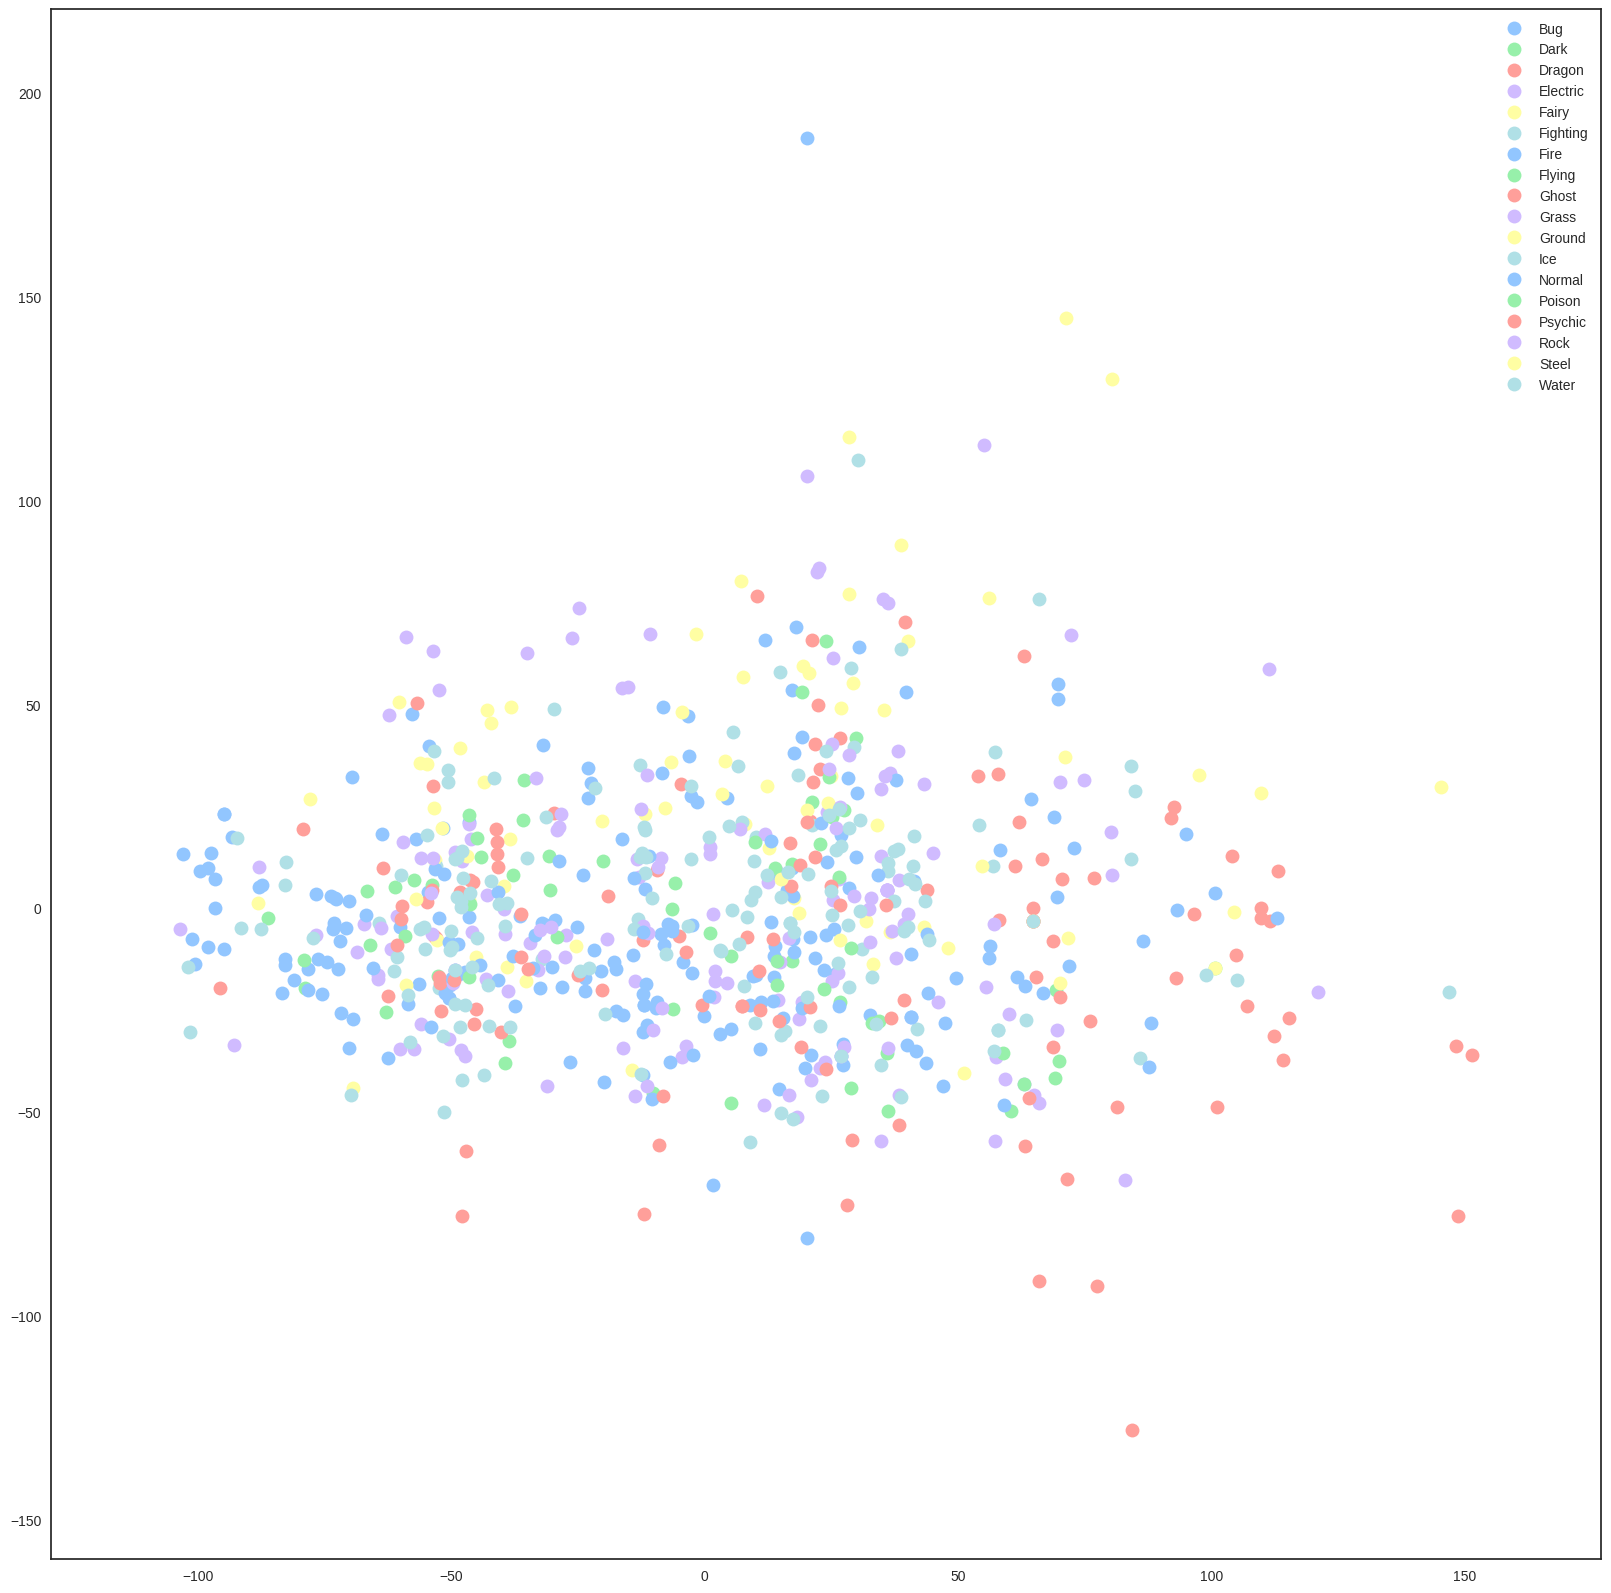

In [10]:
from sklearn.decomposition import PCA

pca = PCA(2)
Xtrans_pca = pca.fit_transform(X)

fig, ax = plt.subplots(figsize = (20, 20))
ax.margins(0.1)
for type_1_label in range(18):
    label = t1_encoder.classes_[type_1_label]
    Xtrans_type = Xtrans_pca[y == type_1_label]
    ax.plot(Xtrans_type[:,0], Xtrans_type[:,1], marker = 'o', linestyle = '', ms = 10, label=label)
ax.legend()

## T-NSE visualization

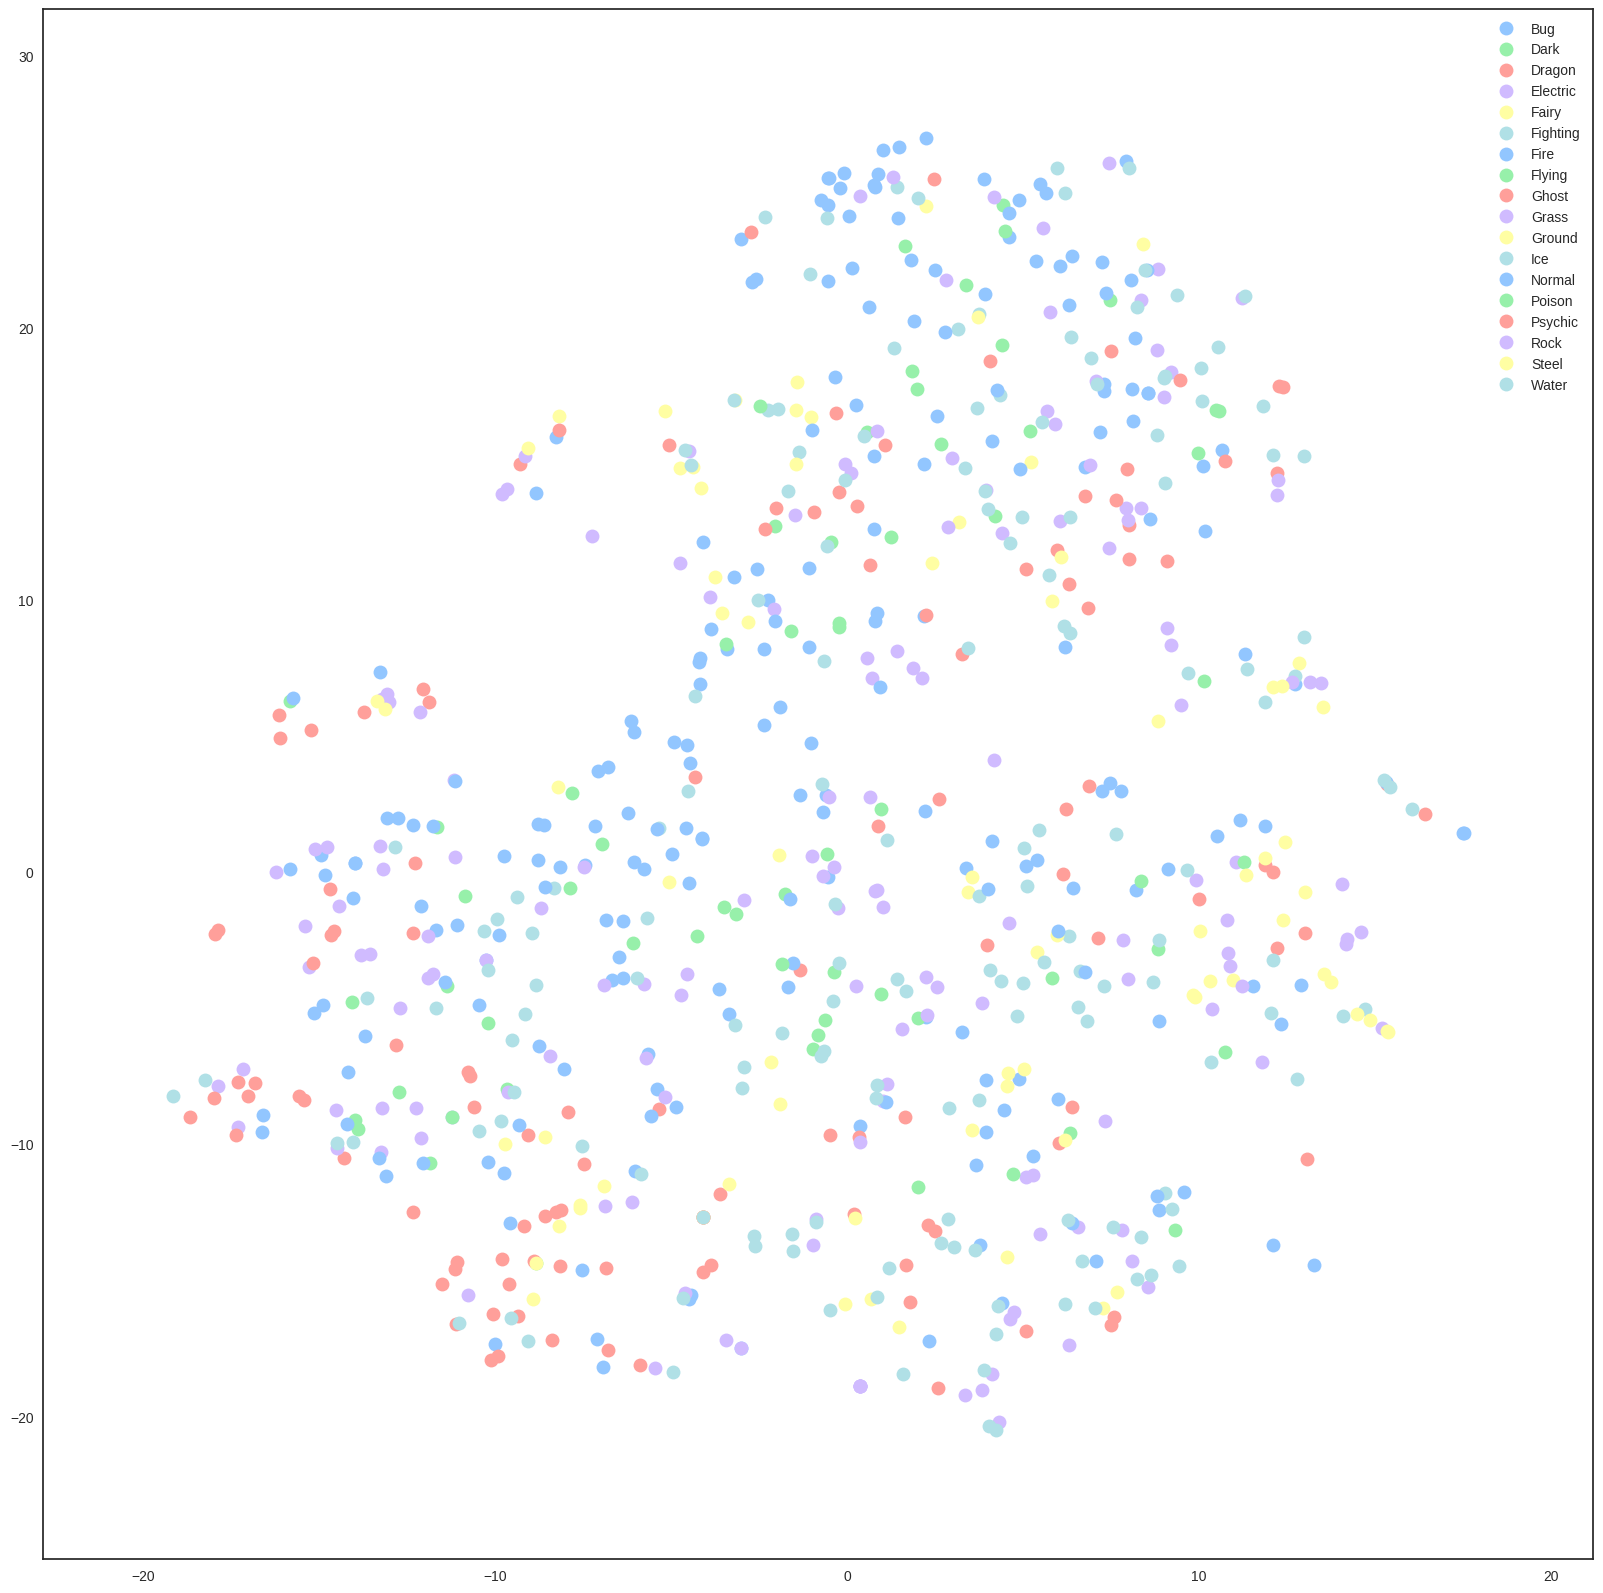

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=state)
Xtrans_tsne = tsne.fit_transform(X)

fig, ax = plt.subplots(figsize=(20,20))
ax.margins(0.1)
for type_1_label in range(18):
    Xtrans_type = Xtrans_tsne[y == type_1_label]
    label = t1_encoder.classes_[type_1_label]
    ax.plot(Xtrans_type[:,0], Xtrans_type[:,1], marker = 'o', linestyle = '', ms = 10, label=label)
ax.legend()

## Predictions

### Data preparation

Scikit-learn imports.

In [12]:
from sklearn.cross_validation import train_test_split

from sklearn.ensemble         import RandomForestClassifier
from sklearn.linear_model     import LogisticRegression
from sklearn.linear_model     import SGDClassifier

We add the result of the PCA and of the TSNE as additional features.

In [13]:
X = np.concatenate([X, Xtrans_pca, Xtrans_tsne], axis = 1).astype(np.float64)
X.shape

(800, 31)

We now split the data into a training set and test set. 

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1, random_state = state)

### Random Forest Classifier

In [15]:
forest = RandomForestClassifier(n_estimators=200, random_state=state)
forest.fit(Xtrain, ytrain)
print(forest.score(Xtest, ytest))

0.3625
